In [1]:
from libs.extract import ExtractFeatures
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


webshell_data = []
benign_data = []

webshells = os.listdir(os.path.curdir + '/data/webshells')
random.shuffle(webshells)

benigns = os.listdir(os.path.curdir + '/data/benigns')
random.shuffle(benigns)

webshellsLongest = []
benignsLongest = []
webshellsEntropy = []
benignsEntropy = []

for file in webshells[0:500]:
    extractor = ExtractFeatures('/data/webshells/'+file, 'dataset.csv')
    result = extractor.extract_function_names()
    webshellsLongest.append({ 'malware': 1, 'longest': extractor.extract_longest_string()})
    webshellsEntropy.append({ 'malware': 1, 'entropy': extractor.extract_entropy_file()})
    result['class'] = 'malware'
    webshell_data.append(result)
  
for file in benigns[0:500]:
    extractor = ExtractFeatures('/data/benigns/'+file, 'dataset.csv')
    result = extractor.extract_function_names()
    benignsLongest.append({ 'malware': 0, 'longest': extractor.extract_longest_string()})
    benignsEntropy.append({ 'malware': 0, 'entropy': extractor.extract_entropy_file()})
    result['class'] = 'benign'
    benign_data.append(result)

df_webshell = pd.DataFrame(webshell_data).fillna(0)
df_benigns = pd.DataFrame(benign_data).fillna(0)

# dataset = pd.concat([df_webshell, df_benigns]).fillna(0)

# col = dataset.pop('class')
# dataset.insert(0, 'class', col)
# dataset.sample(frac=1).reset_index(drop=True).to_csv('dataset.csv')

df = pd.DataFrame(webshellsLongest + benignsLongest)
dataset = df.sample(frac=1).reset_index(drop=True)

df_2 = pd.DataFrame(webshellsEntropy + benignsEntropy)
dataset_2 = df_2.sample(frac=1).reset_index(drop=True)

dataset_2




,malware,entropy
0,0,5.083167
1,1,4.902076
2,0,5.042894
3,1,6.104975
4,1,6.213616
...,...,...
995,1,3.756296
996,0,5.578725
997,1,4.516961
998,0,4.807028


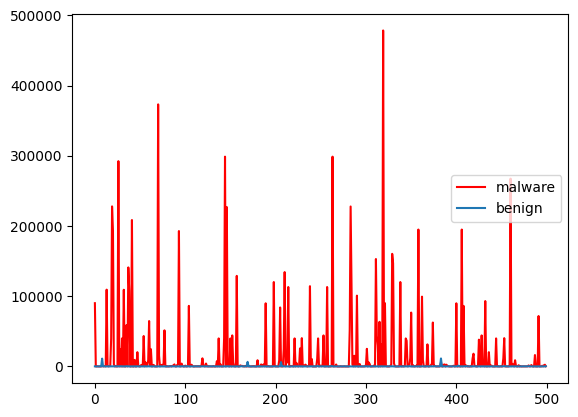

In [21]:
import matplotlib.pyplot as plt
import numpy as np


df_webshell = pd.DataFrame(webshellsLongest)
df_benign = pd.DataFrame(benignsLongest)

plt.plot(df_webshell['longest'], c='red')
plt.plot(df_benign['longest'])

plt.legend(["malware", "benign"], loc ="right")
plt.show()

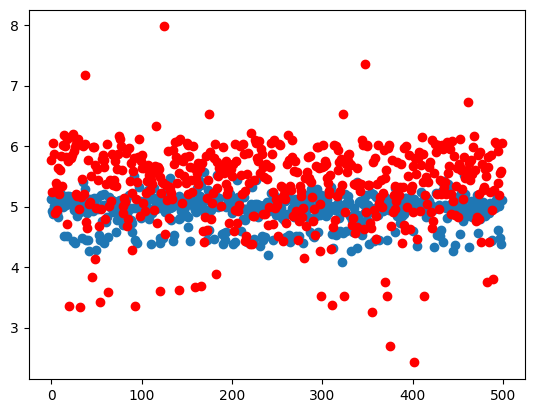

In [11]:
import matplotlib.pyplot as plt
import numpy as np


df_webshell = pd.DataFrame(webshellsEntropy)
df_benign = pd.DataFrame(benignsEntropy)

xpoints = np.array(df_benign.index.array)
ypoints = np.array(df_benign['entropy'])

plt.scatter(xpoints, ypoints)

xpoints = np.array(df_webshell.index.array)
ypoints = np.array(df_webshell['entropy'])

plt.scatter(xpoints, ypoints, c='red')
plt.legend(['benign', 'malware'])

plt.show()



In [ ]:
from libs.extract import ExtractFeatures
import os
import random
import pandas as pd

file = '5284c689364b3d94f6abf428e87b35c6.php'
extractor = ExtractFeatures('/data/webshells/'+file, 'dataset_test.csv')
extractor.extract_longest_string()
